In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime
import platform


In [3]:

#preparing tensorboard for evaluations
# make sure to research on this
%load_ext tensorboard
!rm -rf ./.logs/

In [4]:
#this right here is to load the data set into the variable make sure u learn this
MNIST_data_set=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=MNIST_data_set.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
pd.DataFrame(X_train[0])


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


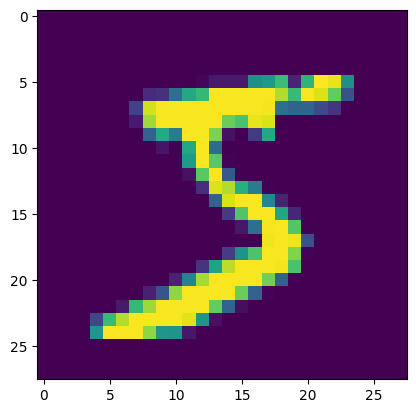

In [6]:
# here we are using matplotlib for image visualization
plt.imshow(X_train[0])
plt.show()

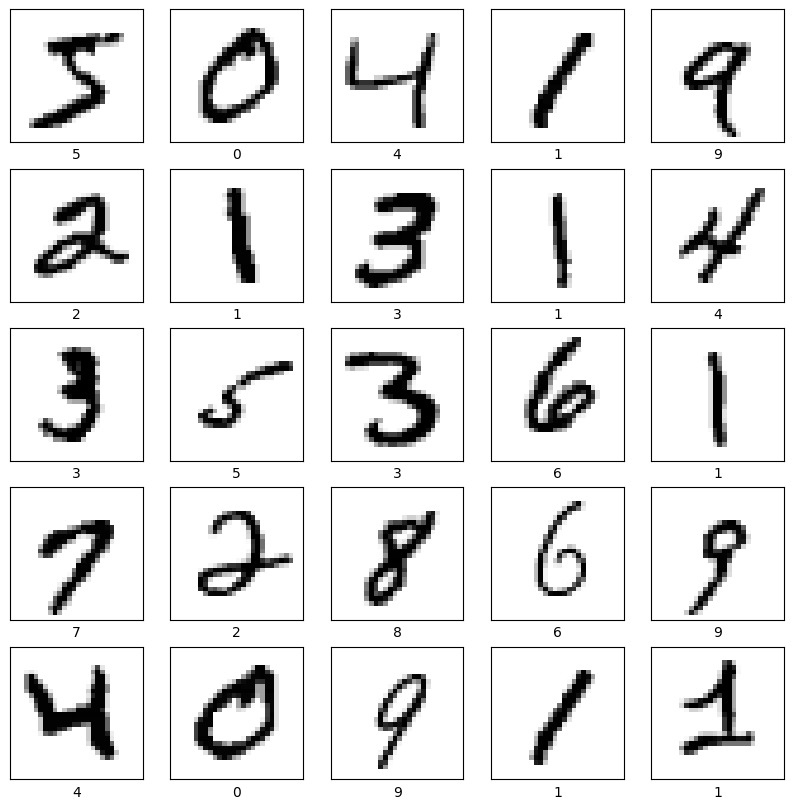

In [7]:
#this is the grid showcasing of the numbers just for visualization
# future me try to understand these first i know you didn't got it

numbers_todisplay=25
num_ceil=math.ceil(math.sqrt(numbers_todisplay))
plt.figure(figsize=(10,10))
for i in range(numbers_todisplay):
  plt.subplot(num_ceil,num_ceil,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i],cmap=plt.cm.binary)
  plt.xlabel(Y_train[i])
plt.show()



In [8]:
#image normalization
X_train_normalized=X_train/255
X_test_normalized=X_test/255


In [9]:
with pd.option_context("display.float_format","{:,.2f}".format):
  display(pd.DataFrame(X_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


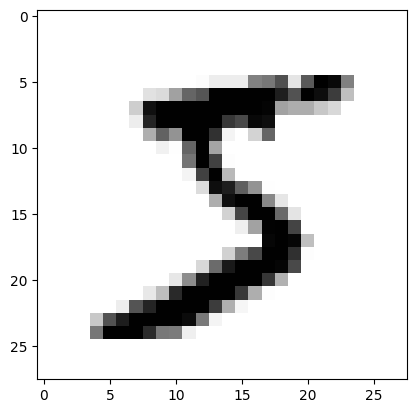

In [10]:
plt.imshow(X_train_normalized[0],cmap=plt.cm.binary)
plt.show()

In [13]:
## model building in this part
model=tf.keras.models.Sequential()


## INPUT LAYERS
model.add(tf.keras.layers.Flatten(input_shape=X_test_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation="relu",
     kernel_regularizer=tf.keras.regularizers.l2(0.002)
))


## HIDDEN LAYERS
model.add(tf.keras.layers.Dense(
    units=128,
    activation="relu",
     kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

## OUTPUT LAYERS
model.add(tf.keras.layers.Dense(
    units=10,
    activation="softmax"
))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

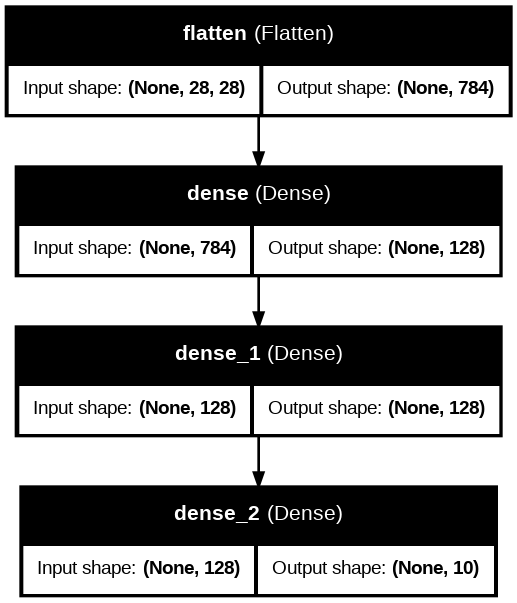

In [15]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96
)

In [16]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [17]:
log_dir=f"./.logs/fit/{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

early_stoppage_callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
)
training_history=model.fit(
    X_train_normalized,
    Y_train,
    epochs=15,
    validation_data=(X_test_normalized,Y_test),
    callbacks=[tensorboard_callback,early_stoppage_callback]

)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8756 - loss: 0.7731 - val_accuracy: 0.9491 - val_loss: 0.3322
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9525 - loss: 0.3159 - val_accuracy: 0.9607 - val_loss: 0.2675
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9622 - loss: 0.2606 - val_accuracy: 0.9561 - val_loss: 0.2737
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9632 - loss: 0.2438 - val_accuracy: 0.9663 - val_loss: 0.2288
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9659 - loss: 0.2250 - val_accuracy: 0.9662 - val_loss: 0.2173
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9683 - loss: 0.2121 - val_accuracy: 0.9694 - val_loss: 0.2032
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9677 - loss: 0.2060 - val_accuracy: 0.9698 - val_loss: 0.1937
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9707 - loss: 0.1956 -

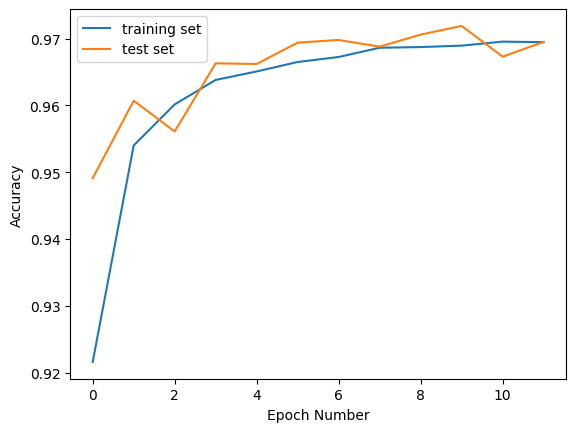

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

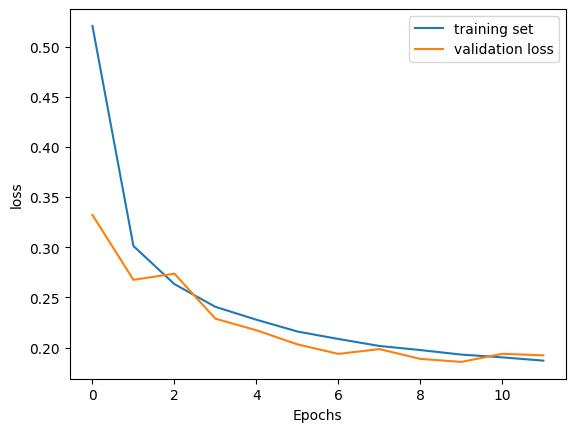

In [19]:
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.plot(training_history.history["loss"],label="training set")
plt.plot(training_history.history["val_loss"],label="validation loss")
plt.legend()

In [20]:
%%capture
train_loss,train_accuracy=model.evaluate(X_train_normalized,Y_train)
test_loss,test_accuracy=model.evaluate(X_test_normalized,Y_test)

In [21]:
print("train_loss=",train_loss)
print("train_accuracy=",train_accuracy)
print("test_loss=",test_loss)
print("test_accuracy=",test_accuracy)

train_loss= 0.1774565577507019
train_accuracy= 0.9720333218574524
test_loss= 0.19227302074432373
test_accuracy= 0.9695000052452087


In [22]:
model_name = 'handwritten digit recognizer.h5'
model.save(model_name, save_format='h5')

In [23]:
loaded_model = tf.keras.models.load_model(model_name)

In [24]:
%tensorboard --logdir .logs/fit

<IPython.core.display.Javascript object>

In [25]:
from google.colab import files
files.download(model_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>